In [5]:
!pip install yahoo_fin

In [6]:
!pip install pmdarima

In [2]:
import numpy as np
import matplotlib.pylab as plt

import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-2-5dc1179fb5bc>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
import yahoo_fin.stock_info as si
from yahoo_fin import options
from yahoo_fin.stock_info import get_data, tickers_sp500, tickers_nasdaq, tickers_other, get_quote_table

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
import statsmodels

ModuleNotFoundError: No module named 'yahoo_fin'

In [4]:
from sklearn.model_selection import train_test_split

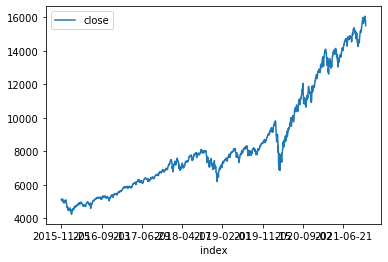

In [96]:
nasdaq = pd.read_csv("nasdaq.csv")
nasdaq = nasdaq.rename(columns = {'Unnamed: 0': 'index'})
nasdaq.plot('index', 'close')

In [66]:
trend = [np.nan]
for i in range(1511):
    if (nasdaq['close'][i+1] > nasdaq['close'][i]):
        trend.append(1)
    else:
        trend.append(-1)
trend

[nan,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,

In [97]:
nasdaq['trend'] = trend

In [68]:
apple = pd.read_csv("apple.csv")
apple = apple.rename(columns = {'Unnamed: 0': 'index'})
apple = apple.rename(columns = {'close': 'apple'})
apple = apple.drop('index', axis = 1)
apple

,apple
0,29.507500
1,29.452499
2,29.575001
3,29.334999
4,29.070000
...,...
1508,161.020004
1509,161.410004
1510,161.940002
1511,156.809998


In [69]:
google = pd.read_csv("google.csv")
google = google.rename(columns = {'Unnamed: 0': 'index'})
google = google.rename(columns = {'close': 'google'})
google = google.drop('index', axis = 1)
google

,google
0,748.150024
1,750.260010
2,742.599976
3,767.039978
4,762.380005
...,...
1508,2941.570068
1509,2935.139893
1510,2934.350098
1511,2856.120117


In [70]:
tesla = pd.read_csv("tesla.csv")
tesla = tesla.rename(columns = {'Unnamed: 0': 'index'})
tesla = tesla.rename(columns = {'close': 'tesla'})
tesla = tesla.drop('index', axis = 1)
tesla

,tesla
0,45.928001
1,46.321999
2,46.051998
3,47.438000
4,46.397999
...,...
1508,1156.869995
1509,1109.030029
1510,1116.000000
1511,1081.920044


In [98]:
nasdaq = pd.concat([nasdaq, apple, google, tesla], axis = 1)
nasdaq

,index,close,trend,apple,google,tesla
0,2015-11-25,5116.140137,NaN,29.507500,748.150024,45.928001
1,2015-11-27,5127.520020,1.0,29.452499,750.260010,46.321999
2,2015-11-30,5108.669922,-1.0,29.575001,742.599976,46.051998
3,2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000
4,2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999
...,...,...,...,...,...,...
1508,2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995
1509,2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029
1510,2021-11-24,15845.230469,1.0,161.940002,2934.350098,1116.000000
1511,2021-11-26,15491.660156,-1.0,156.809998,2856.120117,1081.920044


In [99]:
nasdaq = nasdaq.set_index('index')

In [100]:
nasdaq

,close,trend,apple,google,tesla
index,,,,,
2015-11-25,5116.140137,NaN,29.507500,748.150024,45.928001
2015-11-27,5127.520020,1.0,29.452499,750.260010,46.321999
2015-11-30,5108.669922,-1.0,29.575001,742.599976,46.051998
2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000
2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999
...,...,...,...,...,...
2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995
2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029
2021-11-24,15845.230469,1.0,161.940002,2934.350098,1116.000000


In [101]:
close2 = [np.nan]
close2.extend(nasdaq['close'].tolist())
close2.pop()
close2

[nan,
 5116.14013671875,
 5127.52001953125,
 5108.669921875,
 5156.31005859375,
 5123.22021484375,
 5037.52978515625,
 5142.27001953125,
 5101.81005859375,
 5098.240234375,
 5022.8701171875,
 5045.169921875,
 4933.47021484375,
 4952.22998046875,
 4995.35986328125,
 5071.1298828125,
 5002.5498046875,
 4923.080078125,
 4968.919921875,
 5001.10986328125,
 5045.93017578125,
 5048.490234375,
 5040.990234375,
 5107.93994140625,
 5065.85009765625,
 5007.41015625,
 4903.08984375,
 4891.43017578125,
 4835.759765625,
 4689.43017578125,
 4643.6298828125,
 4637.990234375,
 4685.919921875,
 4526.06005859375,
 4615.0,
 4488.419921875,
 4476.9501953125,
 4471.68994140625,
 4472.06005859375,
 4591.18017578125,
 4518.490234375,
 4567.669921875,
 4468.169921875,
 4506.68017578125,
 4613.9501953125,
 4620.3701171875,
 4516.9501953125,
 4504.240234375,
 4509.56005859375,
 4363.14013671875,
 4283.75,
 4268.759765625,
 4283.58984375,
 4266.83984375,
 4337.509765625,
 4435.9599609375,
 4534.06005859375,
 448

In [102]:
nasdaq2 = nasdaq
nasdaq2['close2'] = close2
nasdaq2 = nasdaq2.drop(['2015-11-25'])
nasdaq2

,close,trend,apple,google,tesla,close2
index,,,,,,
2015-11-27,5127.520020,1.0,29.452499,750.260010,46.321999,5116.140137
2015-11-30,5108.669922,-1.0,29.575001,742.599976,46.051998,5127.520020
2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000,5108.669922
2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999,5156.310059
2015-12-03,5037.529785,-1.0,28.799999,752.539978,46.542000,5123.220215
...,...,...,...,...,...,...
2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995,16057.440430
2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029,15854.759766
2021-11-24,15845.230469,1.0,161.940002,2934.350098,1116.000000,15775.139648


In [103]:
close3 = [np.nan]
close3.extend(nasdaq['close'].tolist())
close3.pop()
close3.pop()
close3
nasdaq2['close3'] = close3
nasdaq2 = nasdaq2.drop(['2015-11-27'])
nasdaq2

,close,trend,apple,google,tesla,close2,close3
index,,,,,,,
2015-11-30,5108.669922,-1.0,29.575001,742.599976,46.051998,5127.520020,5116.140137
2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000,5108.669922,5127.520020
2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999,5156.310059,5108.669922
2015-12-03,5037.529785,-1.0,28.799999,752.539978,46.542000,5123.220215,5156.310059
2015-12-04,5142.270020,1.0,29.757500,766.809998,46.076000,5037.529785,5123.220215
...,...,...,...,...,...,...,...
2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995,16057.440430,15993.709961
2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029,15854.759766,16057.440430
2021-11-24,15845.230469,1.0,161.940002,2934.350098,1116.000000,15775.139648,15854.759766


In [104]:
close4 = [np.nan]
close4.extend(nasdaq['close'].tolist())
close4.pop()
close4.pop()
close4.pop()
nasdaq2['close4'] = close4
nasdaq2 = nasdaq2.drop(['2015-11-30'])
nasdaq2

,close,trend,apple,google,tesla,close2,close3,close4
index,,,,,,,,
2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000,5108.669922,5127.520020,5116.140137
2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999,5156.310059,5108.669922,5127.520020
2015-12-03,5037.529785,-1.0,28.799999,752.539978,46.542000,5123.220215,5156.310059,5108.669922
2015-12-04,5142.270020,1.0,29.757500,766.809998,46.076000,5037.529785,5123.220215,5156.310059
2015-12-07,5101.810059,-1.0,29.570000,763.250000,46.226002,5142.270020,5037.529785,5123.220215
...,...,...,...,...,...,...,...,...
2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995,16057.440430,15993.709961,15921.570312
2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029,15854.759766,16057.440430,15993.709961
2021-11-24,15845.230469,1.0,161.940002,2934.350098,1116.000000,15775.139648,15854.759766,16057.440430


In [395]:
close5 = [np.nan]
close5.extend(nasdaq['close'].tolist())
close5.pop()
close5.pop()
close5.pop()
close5.pop()
nasdaq2['close5'] = close5
nasdaq2 = nasdaq2.drop(['2015-12-01'])
nasdaq2

,close,trend,close2,close3,close4,close5
index,,,,,,
2015-12-02,5123.220215,-1.0,5156.310059,5108.669922,5127.520020,5116.140137
2015-12-03,5037.529785,-1.0,5123.220215,5156.310059,5108.669922,5127.520020
2015-12-04,5142.270020,1.0,5037.529785,5123.220215,5156.310059,5108.669922
2015-12-07,5101.810059,-1.0,5142.270020,5037.529785,5123.220215,5156.310059
2015-12-08,5098.240234,-1.0,5101.810059,5142.270020,5037.529785,5123.220215
...,...,...,...,...,...,...
2021-11-19,16057.440430,1.0,15993.709961,15921.570312,15973.860352,15853.849609
2021-11-22,15854.759766,-1.0,16057.440430,15993.709961,15921.570312,15973.860352
2021-11-23,15775.139648,-1.0,15854.759766,16057.440430,15993.709961,15921.570312


In [421]:
close6 = [np.nan]
close6.extend(nasdaq['close'].tolist())
close6.pop()
close6.pop()
close6.pop()
close6.pop()
close6.pop()
nasdaq2['close6'] = close6
nasdaq2 = nasdaq2.drop(['2015-12-02'])
nasdaq2

,close,trend,close2,close3,close4,close5,close6
index,,,,,,,
2015-12-03,5037.529785,-1.0,5123.220215,5156.310059,5108.669922,5127.520020,5116.140137
2015-12-04,5142.270020,1.0,5037.529785,5123.220215,5156.310059,5108.669922,5127.520020
2015-12-07,5101.810059,-1.0,5142.270020,5037.529785,5123.220215,5156.310059,5108.669922
2015-12-08,5098.240234,-1.0,5101.810059,5142.270020,5037.529785,5123.220215,5156.310059
2015-12-09,5022.870117,-1.0,5098.240234,5101.810059,5142.270020,5037.529785,5123.220215
...,...,...,...,...,...,...,...
2021-11-19,16057.440430,1.0,15993.709961,15921.570312,15973.860352,15853.849609,15860.959961
2021-11-22,15854.759766,-1.0,16057.440430,15993.709961,15921.570312,15973.860352,15853.849609
2021-11-23,15775.139648,-1.0,15854.759766,16057.440430,15993.709961,15921.570312,15973.860352


In [105]:
nasdaq2.drop(nasdaq2.tail(1).index,inplace=True)
nasdaq2

,close,trend,apple,google,tesla,close2,close3,close4
index,,,,,,,,
2015-12-01,5156.310059,1.0,29.334999,767.039978,47.438000,5108.669922,5127.520020,5116.140137
2015-12-02,5123.220215,-1.0,29.070000,762.380005,46.397999,5156.310059,5108.669922,5127.520020
2015-12-03,5037.529785,-1.0,28.799999,752.539978,46.542000,5123.220215,5156.310059,5108.669922
2015-12-04,5142.270020,1.0,29.757500,766.809998,46.076000,5037.529785,5123.220215,5156.310059
2015-12-07,5101.810059,-1.0,29.570000,763.250000,46.226002,5142.270020,5037.529785,5123.220215
...,...,...,...,...,...,...,...,...
2021-11-19,16057.440430,1.0,160.550003,2999.050049,1137.060059,15993.709961,15921.570312,15973.860352
2021-11-22,15854.759766,-1.0,161.020004,2941.570068,1156.869995,16057.440430,15993.709961,15921.570312
2021-11-23,15775.139648,-1.0,161.410004,2935.139893,1109.030029,15854.759766,16057.440430,15993.709961


In [89]:
X = nasdaq2[['close2', 'apple', 'google', 'tesla']]
y = nasdaq2['trend']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 3/6, test_size=90, random_state=42)

In [116]:
X = nasdaq2[['close2', 'close3', 'close4','apple', 'google', 'tesla']]
y = nasdaq2['trend']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 5/6, test_size=90, random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'ovr').fit(X_train, y_train)
clf.score(X_train, y_train)

0.6077963404932378

In [118]:
y_pred = clf.predict(X_test)
y_pred

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.])

In [119]:
import sklearn.metrics as metrics

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5888888888888889
Precision: 0.625
Recall: 0.8771929824561403


# S&P500

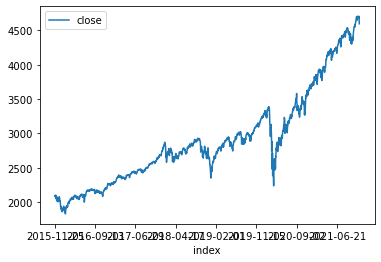

In [121]:
sp500 = pd.read_csv("sq500.csv")
sp500 = sp500.rename(columns = {'Unnamed: 0': 'index'})
sp500.plot('index', 'close')

In [122]:
trend = [np.nan]
for i in range(1511):
    if (sp500['close'][i+1] > sp500['close'][i]):
        trend.append(1)
    else:
        trend.append(-1)
trend

[nan,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,

In [123]:
sp500 = pd.concat([sp500, apple, google, tesla], axis = 1)
sp500

,index,close,apple,google,tesla
0,2015-11-25,2088.870117,29.507500,748.150024,45.928001
1,2015-11-27,2090.110107,29.452499,750.260010,46.321999
2,2015-11-30,2080.409912,29.575001,742.599976,46.051998
3,2015-12-01,2102.629883,29.334999,767.039978,47.438000
4,2015-12-02,2079.510010,29.070000,762.380005,46.397999
...,...,...,...,...,...
1508,2021-11-22,4682.939941,161.020004,2941.570068,1156.869995
1509,2021-11-23,4690.700195,161.410004,2935.139893,1109.030029
1510,2021-11-24,4701.459961,161.940002,2934.350098,1116.000000
1511,2021-11-26,4594.620117,156.809998,2856.120117,1081.920044


In [125]:
sp500.drop(sp500.tail(1).index,inplace=True)
sp500

,index,close,apple,google,tesla
0,2015-11-25,2088.870117,29.507500,748.150024,45.928001
1,2015-11-27,2090.110107,29.452499,750.260010,46.321999
2,2015-11-30,2080.409912,29.575001,742.599976,46.051998
3,2015-12-01,2102.629883,29.334999,767.039978,47.438000
4,2015-12-02,2079.510010,29.070000,762.380005,46.397999
...,...,...,...,...,...
1507,2021-11-19,4697.959961,160.550003,2999.050049,1137.060059
1508,2021-11-22,4682.939941,161.020004,2941.570068,1156.869995
1509,2021-11-23,4690.700195,161.410004,2935.139893,1109.030029
1510,2021-11-24,4701.459961,161.940002,2934.350098,1116.000000


In [126]:
sp500['trend'] = trend
sp500 = sp500.set_index('index')

In [127]:
sp500

,close,apple,google,tesla,trend
index,,,,,
2015-11-25,2088.870117,29.507500,748.150024,45.928001,NaN
2015-11-27,2090.110107,29.452499,750.260010,46.321999,1.0
2015-11-30,2080.409912,29.575001,742.599976,46.051998,-1.0
2015-12-01,2102.629883,29.334999,767.039978,47.438000,1.0
2015-12-02,2079.510010,29.070000,762.380005,46.397999,-1.0
...,...,...,...,...,...
2021-11-19,4697.959961,160.550003,2999.050049,1137.060059,-1.0
2021-11-22,4682.939941,161.020004,2941.570068,1156.869995,-1.0
2021-11-23,4690.700195,161.410004,2935.139893,1109.030029,1.0


In [144]:
close2 = [np.nan]
close2.extend(sp500['close'].tolist())
close2.pop()
sp2 = sp500
sp2['close2'] = close2
sp2 = sp2.drop(['2015-11-25'])
sp2

,close,apple,google,tesla,trend,close2
index,,,,,,
2015-11-27,2090.110107,29.452499,750.260010,46.321999,1.0,2088.870117
2015-11-30,2080.409912,29.575001,742.599976,46.051998,-1.0,2090.110107
2015-12-01,2102.629883,29.334999,767.039978,47.438000,1.0,2080.409912
2015-12-02,2079.510010,29.070000,762.380005,46.397999,-1.0,2102.629883
2015-12-03,2049.620117,28.799999,752.539978,46.542000,-1.0,2079.510010
...,...,...,...,...,...,...
2021-11-19,4697.959961,160.550003,2999.050049,1137.060059,-1.0,4704.540039
2021-11-22,4682.939941,161.020004,2941.570068,1156.869995,-1.0,4697.959961
2021-11-23,4690.700195,161.410004,2935.139893,1109.030029,1.0,4682.939941


In [145]:
close3 = [np.nan]
close3.extend(sp500['close'].tolist())
close3.pop()
close3.pop()
close3
sp2['close3'] = close3
sp2 = sp2.drop(['2015-11-27'])
sp2

,close,apple,google,tesla,trend,close2,close3
index,,,,,,,
2015-11-30,2080.409912,29.575001,742.599976,46.051998,-1.0,2090.110107,2088.870117
2015-12-01,2102.629883,29.334999,767.039978,47.438000,1.0,2080.409912,2090.110107
2015-12-02,2079.510010,29.070000,762.380005,46.397999,-1.0,2102.629883,2080.409912
2015-12-03,2049.620117,28.799999,752.539978,46.542000,-1.0,2079.510010,2102.629883
2015-12-04,2091.689941,29.757500,766.809998,46.076000,1.0,2049.620117,2079.510010
...,...,...,...,...,...,...,...
2021-11-19,4697.959961,160.550003,2999.050049,1137.060059,-1.0,4704.540039,4688.669922
2021-11-22,4682.939941,161.020004,2941.570068,1156.869995,-1.0,4697.959961,4704.540039
2021-11-23,4690.700195,161.410004,2935.139893,1109.030029,1.0,4682.939941,4697.959961


In [146]:
close4 = [np.nan]
close4.extend(sp500['close'].tolist())
close4.pop()
close4.pop()
close4.pop()
sp2['close4'] = close4
sp2 = sp2.drop(['2015-11-30'])
sp2

,close,apple,google,tesla,trend,close2,close3,close4
index,,,,,,,,
2015-12-01,2102.629883,29.334999,767.039978,47.438000,1.0,2080.409912,2090.110107,2088.870117
2015-12-02,2079.510010,29.070000,762.380005,46.397999,-1.0,2102.629883,2080.409912,2090.110107
2015-12-03,2049.620117,28.799999,752.539978,46.542000,-1.0,2079.510010,2102.629883,2080.409912
2015-12-04,2091.689941,29.757500,766.809998,46.076000,1.0,2049.620117,2079.510010,2102.629883
2015-12-07,2077.070068,29.570000,763.250000,46.226002,-1.0,2091.689941,2049.620117,2079.510010
...,...,...,...,...,...,...,...,...
2021-11-19,4697.959961,160.550003,2999.050049,1137.060059,-1.0,4704.540039,4688.669922,4700.899902
2021-11-22,4682.939941,161.020004,2941.570068,1156.869995,-1.0,4697.959961,4704.540039,4688.669922
2021-11-23,4690.700195,161.410004,2935.139893,1109.030029,1.0,4682.939941,4697.959961,4704.540039


In [147]:
close5 = [np.nan]
close5.extend(sp500['close'].tolist())
close5.pop()
close5.pop()
close5.pop()
close5.pop()
sp2['close5'] = close5
sp2 = sp2.drop(['2015-12-01'])
sp2

,close,apple,google,tesla,trend,close2,close3,close4,close5
index,,,,,,,,,
2015-12-02,2079.510010,29.070000,762.380005,46.397999,-1.0,2102.629883,2080.409912,2090.110107,2088.870117
2015-12-03,2049.620117,28.799999,752.539978,46.542000,-1.0,2079.510010,2102.629883,2080.409912,2090.110107
2015-12-04,2091.689941,29.757500,766.809998,46.076000,1.0,2049.620117,2079.510010,2102.629883,2080.409912
2015-12-07,2077.070068,29.570000,763.250000,46.226002,-1.0,2091.689941,2049.620117,2079.510010,2102.629883
2015-12-08,2063.590088,29.557501,762.369995,45.344002,-1.0,2077.070068,2091.689941,2049.620117,2079.510010
...,...,...,...,...,...,...,...,...,...
2021-11-19,4697.959961,160.550003,2999.050049,1137.060059,-1.0,4704.540039,4688.669922,4700.899902,4682.799805
2021-11-22,4682.939941,161.020004,2941.570068,1156.869995,-1.0,4697.959961,4704.540039,4688.669922,4700.899902
2021-11-23,4690.700195,161.410004,2935.139893,1109.030029,1.0,4682.939941,4697.959961,4704.540039,4688.669922


In [547]:
close6 = [np.nan]
close6.extend(sp500['close'].tolist())
close6.pop()
close6.pop()
close6.pop()
close6.pop()
close6.pop()
sp2['close6'] = close6
sp2 = sp2.drop(['2015-12-02'])
sp2

,close,trend,close2,close3,close4,close5,close6
index,,,,,,,
2015-12-03,2049.620117,-1.0,2079.510010,2102.629883,2080.409912,2090.110107,2088.870117
2015-12-04,2091.689941,1.0,2049.620117,2079.510010,2102.629883,2080.409912,2090.110107
2015-12-07,2077.070068,-1.0,2091.689941,2049.620117,2079.510010,2102.629883,2080.409912
2015-12-08,2063.590088,-1.0,2077.070068,2091.689941,2049.620117,2079.510010,2102.629883
2015-12-09,2047.619995,-1.0,2063.590088,2077.070068,2091.689941,2049.620117,2079.510010
...,...,...,...,...,...,...,...
2021-11-19,4697.959961,-1.0,4704.540039,4688.669922,4700.899902,4682.799805,4682.850098
2021-11-22,4682.939941,-1.0,4697.959961,4704.540039,4688.669922,4700.899902,4682.799805
2021-11-23,4690.700195,1.0,4682.939941,4697.959961,4704.540039,4688.669922,4700.899902


In [472]:
X = sp2['close2'].values.reshape(-1,1)
y = sp2['trend']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 5/6, test_size=90, random_state=42)

In [156]:
X = sp2[['close2', 'close3', 'close4', 'close5', 'apple', 'google', 'tesla']]
y = sp2['trend']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 5/6, test_size=90, random_state=42)

In [157]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'ovr').fit(X_train, y_train)
clf.score(X_train, y_train)

0.5883757961783439

In [158]:
y_pred = clf.predict(X_test)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.])

In [159]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6
Precision: 0.6
Recall: 0.9230769230769231


# COVID-19 data

In [216]:
covid = pd.read_csv("owid-covid-data.csv")
us_cases = covid[covid['iso_code'] == 'USA']
us_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
128976,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
128977,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
128978,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
128979,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
128980,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129649,USA,North America,United States,2021-11-25,48125425.0,32602.0,84531.857,776090.0,366.0,966.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
129650,USA,North America,United States,2021-11-26,48176523.0,51098.0,73890.429,776349.0,259.0,752.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
129651,USA,North America,United States,2021-11-27,48201079.0,24556.0,71470.857,776536.0,187.0,731.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
129652,USA,North America,United States,2021-11-28,48229210.0,28131.0,70093.714,776639.0,103.0,729.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [221]:
us_covid = us_cases[['date','new_cases_smoothed', "new_deaths_smoothed"]]
us_covid = us_covid.set_index('date')
us_covid

,new_cases_smoothed,new_deaths_smoothed
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2021-11-25,84531.857,966.286
2021-11-26,73890.429,752.143
2021-11-27,71470.857,731.286
